In [13]:

pip install librosa

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 52.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 11.2/11.2 MB 69.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ------------------- -------------------- 22.0/46.2 MB 127.2 MB/s eta 0:00:01
   ------------------------------- -------- 35.9/46.2 MB 87.8 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 94.8 MB/s eta 0:00:01
   ---------------------------------------- 46.2/46.2 MB 65.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -------------------------------- ------- 22.5/28.1 MB 109.8 MB/s eta 0:00:01
   ---------------------------------------  28.0/28.1 MB 93.6 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 66.0 MB/s eta 0:00:00
Note: you 

In [1]:
import sounddevice as sd
mic_list = sd.query_devices()
print(mic_list)
print('audio name은 (Microphone(High Definition Audio Device), Windows DirectSound (2 in, 0 out)입니다')
 # 원래 시작 단위로 처음 시작을 절대 잊어버리지 않는거

   0 Microsoft 사운드 매퍼 - Input, MME (2 in, 0 out)
>  1 마이크(G435 Wireless Gaming Headse, MME (1 in, 0 out)
   2 Microphone(High Definition Audi, MME (2 in, 0 out)
   3 Microsoft 사운드 매퍼 - Output, MME (0 in, 2 out)
<  4 헤드셋 이어폰(G435 Wireless Gaming He, MME (0 in, 2 out)
   5 LG FULL HD(NVIDIA High Definiti, MME (0 in, 2 out)
   6 Digital Audio (S/PDIF)(High Def, MME (0 in, 2 out)
   7 JG271F165(NVIDIA High Definitio, MME (0 in, 2 out)
   8 27NAN5(NVIDIA High Definition A, MME (0 in, 2 out)
   9 주 사운드 캡처 드라이버, Windows DirectSound (2 in, 0 out)
  10 마이크(G435 Wireless Gaming Headset), Windows DirectSound (1 in, 0 out)
  11 Microphone(High Definition Audio Device), Windows DirectSound (2 in, 0 out)
  12 주 사운드 드라이버, Windows DirectSound (0 in, 2 out)
  13 헤드셋 이어폰(G435 Wireless Gaming Headset), Windows DirectSound (0 in, 2 out)
  14 LG FULL HD(NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  15 Digital Audio (S/PDIF)(High Definition Audio Device), Windows DirectSound (0 in, 2 ou

In [4]:
import sounddevice as sd
import soundfile as sf
import time
import json

DEVICE = 11   # 후보 장치 번호
SR = 16000
DUR = 5

# 세션 시작 시점 기록
t0 = time.time()

print(f"Recording {DUR}s from device {DEVICE} ...")
audio = sd.rec(int(DUR*SR), samplerate=SR, channels=1, dtype='int16', device=DEVICE)
sd.wait()

# 저장 (원본 wav)
sf.write("test.wav", audio, SR)
print("Saved test.wav")

# 각 샘플의 절대 시간 계산 (원하면 프레임 단위로 downsample 가능)
timestamps = [t0 + i/SR for i in range(len(audio))]

# 메타데이터 저장
meta = {
    "device": DEVICE,
    "sr": SR,
    "duration": DUR,
    "start_time": t0,             # Unix epoch (초)
    "timestamps[0]": timestamps[0],
    "timestamps[-1]": timestamps[-1],
    "total_samples": len(audio)
}

with open("test_meta.json", "w") as f:
    json.dump(meta, f, indent=2)

print("Saved test_meta.json")


Recording 5s from device 11 ...
Saved test.wav
Saved test_meta.json


Mel shape: (64, 501)


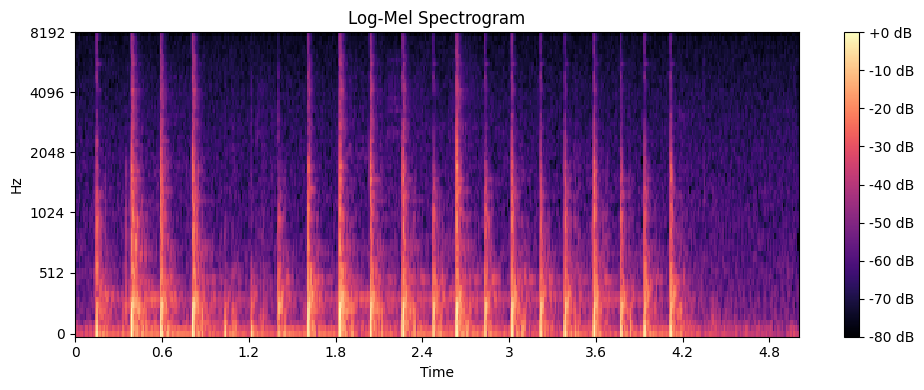

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 1) 오디오 불러오기
y, sr = librosa.load("test.wav", sr=16000)  # sr=16kHz로 리샘플링

# 2) 멜 스펙트로그램 계산
n_fft = 1024         # FFT 윈도우 크기 (보통 20~40ms → 1024 @16kHz)
hop_length = 160     # 홉 크기 (10ms → 160 @16kHz)
win_length = 400     # 윈도우 길이 (25ms → 400 @16kHz)
n_mels = 64          # 멜 필터 개수 (64~128 자주 사용)
fmin, fmax = 50, 8000  # 주파수 대역

S = librosa.feature.melspectrogram(
    y=y, sr=sr, n_fft=n_fft, hop_length=hop_length,
    win_length=win_length, n_mels=n_mels, fmin=fmin, fmax=fmax, power=2.0
)

# 3) 로그 스케일(dB) 변환
S_dB = librosa.power_to_db(S, ref=np.max)

# 4) 저장 및 시각화
np.save("mel.npy", S_dB)  # 학습용 데이터 저장
print("Mel shape:", S_dB.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length,
                         x_axis="time", y_axis="mel", fmax=fmax)
plt.colorbar(format="%+2.0f dB")
plt.title("Log-Mel Spectrogram")
plt.tight_layout()
plt.savefig("mel.png", dpi=200)
plt.show()


In [3]:
S_dB

array([[-32.069706, -31.694025, -34.03051 , ..., -35.653347, -36.099545,
        -36.106224],
       [-37.44423 , -34.65676 , -38.48222 , ..., -41.203743, -38.182922,
        -45.534027],
       [-50.001038, -40.709698, -46.80829 , ..., -50.608864, -46.293827,
        -56.002106],
       ...,
       [-74.06828 , -75.2785  , -74.993126, ..., -75.75848 , -74.57138 ,
        -75.86047 ],
       [-75.15953 , -76.05541 , -72.28919 , ..., -74.40263 , -75.46035 ,
        -76.223946],
       [-79.23908 , -78.17672 , -76.94758 , ..., -77.20235 , -77.68124 ,
        -78.450294]], dtype=float32)